<a href="https://colab.research.google.com/github/AdvaitJay/22BDS0373-EDA/blob/main/EDAproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Data and Libraries**

In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv("https://raw.githubusercontent.com/salemprakash/EDA/main/Data/wages.csv")
data

,rownames,id,lnw,exper,ged,postexp,black,hispanic,hgc,hgc.9,uerate,ue.7,ue.centert1,ue.mean,ue.person.cen,ue1
0,1,31,1.491,0.015,1,0.015,0,1,8,-1,3.21,-3.785,0.00,3.21,0.00,3.21
1,2,31,1.433,0.715,1,0.715,0,1,8,-1,3.21,-3.785,0.00,3.21,0.00,3.21
2,3,31,1.469,1.734,1,1.734,0,1,8,-1,3.21,-3.785,0.00,3.21,0.00,3.21
3,4,31,1.749,2.773,1,2.773,0,1,8,-1,3.30,-3.705,0.08,3.21,0.08,3.21
4,5,31,1.931,3.927,1,3.927,0,1,8,-1,2.89,-4.105,-0.32,3.21,-0.32,3.21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6397,6398,12543,1.466,3.014,0,0.000,0,0,8,-1,10.70,3.700,1.70,8.85,1.85,9.00
6398,6399,12543,1.349,3.654,0,0.000,0,0,8,-1,11.00,4.000,2.00,8.85,2.15,9.00
6399,6400,12543,1.307,5.020,0,0.000,0,0,8,-1,8.80,1.800,-0.20,8.85,-0.05,9.00
6400,6401,12543,1.842,5.681,0,0.000,0,0,8,-1,7.30,0.300,-1.70,8.85,-1.55,9.00


# **Data Dimension**

In [48]:
dimension = data.shape
print(f"No of Rows: {dimension[0]}\nNo of Columns: {dimension[1]}")

No of Rows: 6402
No of Columns: 16


# Summary Statistics

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6402 entries, 0 to 6401
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   rownames       6402 non-null   int64  
 1   id             6402 non-null   int64  
 2   lnw            6402 non-null   float64
 3   exper          6402 non-null   float64
 4   ged            6402 non-null   int64  
 5   postexp        6402 non-null   float64
 6   black          6402 non-null   int64  
 7   hispanic       6402 non-null   int64  
 8   hgc            6402 non-null   int64  
 9   hgc.9          6402 non-null   int64  
 10  uerate         6402 non-null   float64
 11  ue.7           6000 non-null   float64
 12  ue.centert1    5996 non-null   float64
 13  ue.mean        6402 non-null   float64
 14  ue.person.cen  6402 non-null   float64
 15  ue1            6402 non-null   float64
dtypes: float64(9), int64(7)
memory usage: 800.4 KB


# **Data Handling and Cleaning**

In [50]:
print("No of Null Values in Table:")
data.isnull().sum()


No of Null Values in Table:


,0
rownames,0
id,0
lnw,0
exper,0
ged,0
postexp,0
black,0
hispanic,0
hgc,0
hgc.9,0


# **Plotting Missing Values**

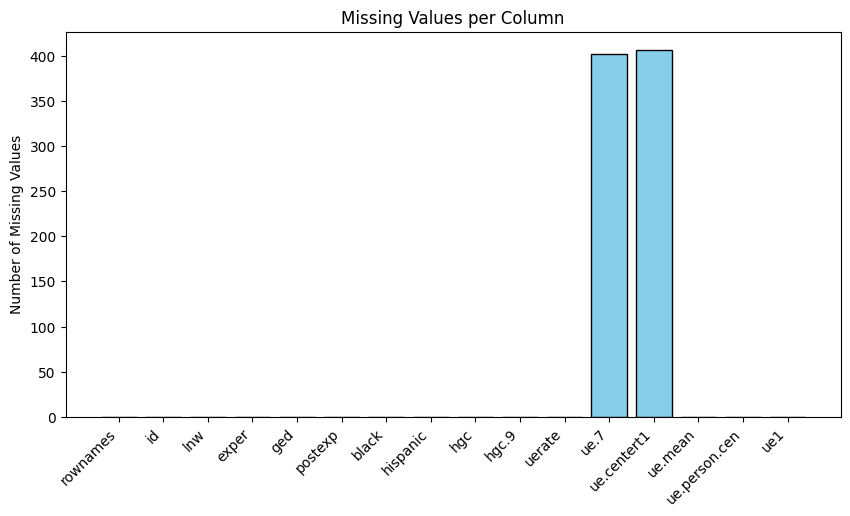

In [51]:
missing_summary = data.isnull().sum().to_frame("Missing_Values")
missing_summary["% Missing"] = (missing_summary["Missing_Values"] / len(data)) * 100

plt.figure(figsize=(10,5))
plt.bar(missing_summary.index, missing_summary["Missing_Values"], color="skyblue", edgecolor="black")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Number of Missing Values")
plt.title("Missing Values per Column")
plt.show()

In [52]:
#Filling in Missing Values Using Mean imputation in ue.7
data["ue.7"].fillna(data["ue.7"].mean(), inplace=True)
#Filling in Missing Values Using Meadian imputation in ue.center1
data["ue.centert1"].fillna(data["ue.centert1"].median(), inplace=True)
print("No of Null Values in table:")
data.isnull().sum()

No of Null Values in table:


,0
rownames,0
id,0
lnw,0
exper,0
ged,0
postexp,0
black,0
hispanic,0
hgc,0
hgc.9,0


In [53]:
print("Duplicate IDs:", data["id"].duplicated().sum())

# Remove duplicates based on 'id'
data = data.drop_duplicates(subset="id", keep="first")

print("Duplicate IDs after removal:", data["id"].duplicated().sum())
print("Dataset shape after removing duplicates:", data.shape)


Duplicate IDs: 5514
Duplicate IDs after removal: 0
Dataset shape after removing duplicates: (888, 16)


# **Using IQR to Find Outliers**

====== lnw (Outlier Detection using IQR) ======
Q1        : 1.5320
Q3        : 1.8920
IQR       : 0.3600
Lower Bnd : 0.9920
Upper Bnd : 2.4320
Outliers  : 66 values (7.43%)




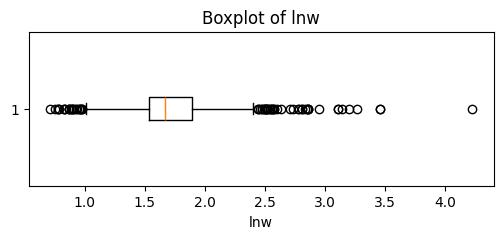

====== exper (Outlier Detection using IQR) ======
Q1        : 0.2638
Q3        : 1.0100
IQR       : 0.7462
Lower Bnd : -0.8556
Upper Bnd : 2.1294
Outliers  : 30 values (3.38%)




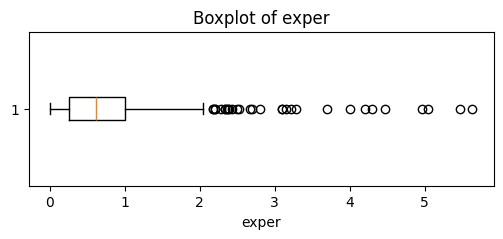

====== postexp (Outlier Detection using IQR) ======
Q1        : 0.0000
Q3        : 0.0000
IQR       : 0.0000
Lower Bnd : 0.0000
Upper Bnd : 0.0000
Outliers  : 162 values (18.24%)




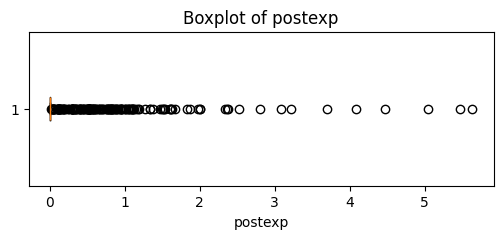

====== hgc (Outlier Detection using IQR) ======
Q1        : 8.0000
Q3        : 10.0000
IQR       : 2.0000
Lower Bnd : 5.0000
Upper Bnd : 13.0000
Outliers  : 0 values (0.00%)




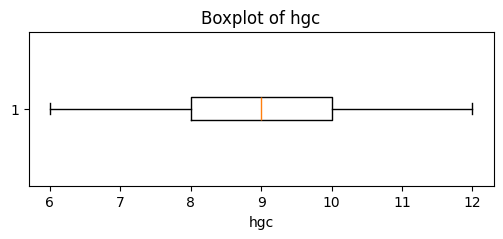

====== uerate (Outlier Detection using IQR) ======
Q1        : 6.2950
Q3        : 10.2000
IQR       : 3.9050
Lower Bnd : 0.4375
Upper Bnd : 16.0575
Outliers  : 48 values (5.41%)




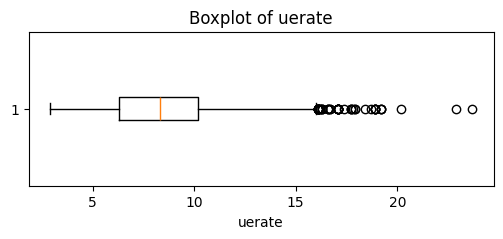

====== ue.7 (Outlier Detection using IQR) ======
Q1        : -0.6050
Q3        : 3.0000
IQR       : 3.6050
Lower Bnd : -6.0125
Upper Bnd : 8.4075
Outliers  : 56 values (6.31%)




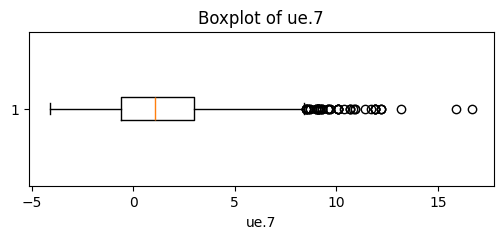

====== ue.centert1 (Outlier Detection using IQR) ======
Q1        : 0.0000
Q3        : 0.0000
IQR       : 0.0000
Lower Bnd : 0.0000
Upper Bnd : 0.0000
Outliers  : 47 values (5.29%)




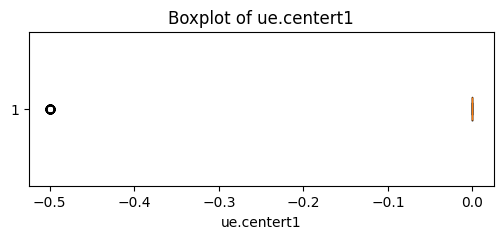

====== ue.mean (Outlier Detection using IQR) ======
Q1        : 6.0500
Q3        : 8.7850
IQR       : 2.7350
Lower Bnd : 1.9475
Upper Bnd : 12.8875
Outliers  : 50 values (5.63%)




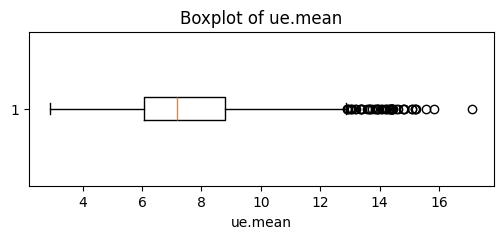

====== ue.person.cen (Outlier Detection using IQR) ======
Q1        : -0.2917
Q3        : 2.3215
IQR       : 2.6132
Lower Bnd : -4.2116
Upper Bnd : 6.2414
Outliers  : 34 values (3.83%)




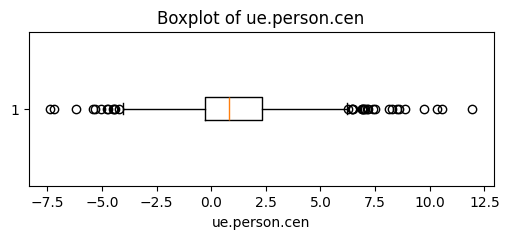

====== ue1 (Outlier Detection using IQR) ======
Q1        : 6.2950
Q3        : 10.2000
IQR       : 3.9050
Lower Bnd : 0.4375
Upper Bnd : 16.0575
Outliers  : 48 values (5.41%)




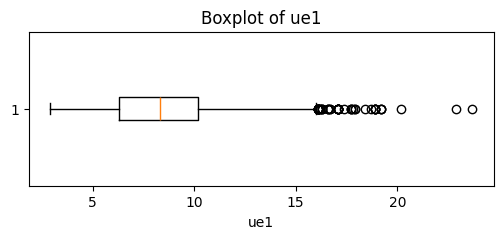

In [54]:
num_vars = ["lnw", "exper", "postexp", "hgc", "uerate", "ue.7",
            "ue.centert1", "ue.mean", "ue.person.cen", "ue1"]

for col in num_vars:
    series = data[col].dropna()

    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = series[(series < lower_bound) | (series > upper_bound)]

    print(f"====== {col} (Outlier Detection using IQR) ======")
    print(f"Q1        : {Q1:.4f}")
    print(f"Q3        : {Q3:.4f}")
    print(f"IQR       : {IQR:.4f}")
    print(f"Lower Bnd : {lower_bound:.4f}")
    print(f"Upper Bnd : {upper_bound:.4f}")
    print(f"Outliers  : {len(outliers)} values ({100*len(outliers)/len(series):.2f}%)")
    print("\n")

    # Boxplot to visualize outliers
    plt.figure(figsize=(6,2))
    plt.boxplot(series, vert=False)
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)
    plt.show()


# **Univariate Analysis**

====== lnw : Natural logarithm of wages ======
Count     : 888
Mean      : 1.7323
Median    : 1.6705
Variance  : 0.1412
Std Dev   : 0.3758
Mode      : 1.5320
IQR       : 0.3600
Range     : 3.5210
Min       : 0.7080
Max       : 4.2290




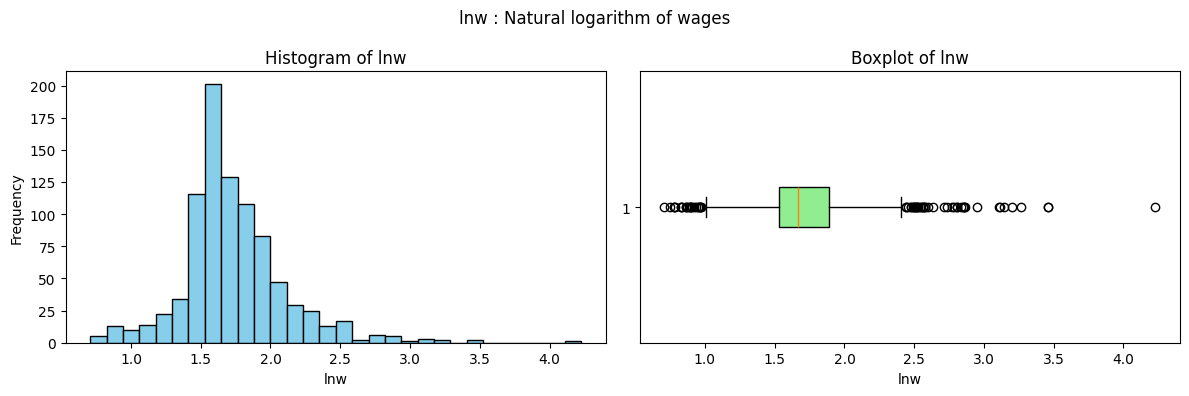

====== exper : Total years of work experience ======
Count     : 888
Mean      : 0.7567
Median    : 0.6240
Variance  : 0.4690
Std Dev   : 0.6848
Mode      : 1.5000
IQR       : 0.7462
Range     : 5.6360
Min       : 0.0010
Max       : 5.6370




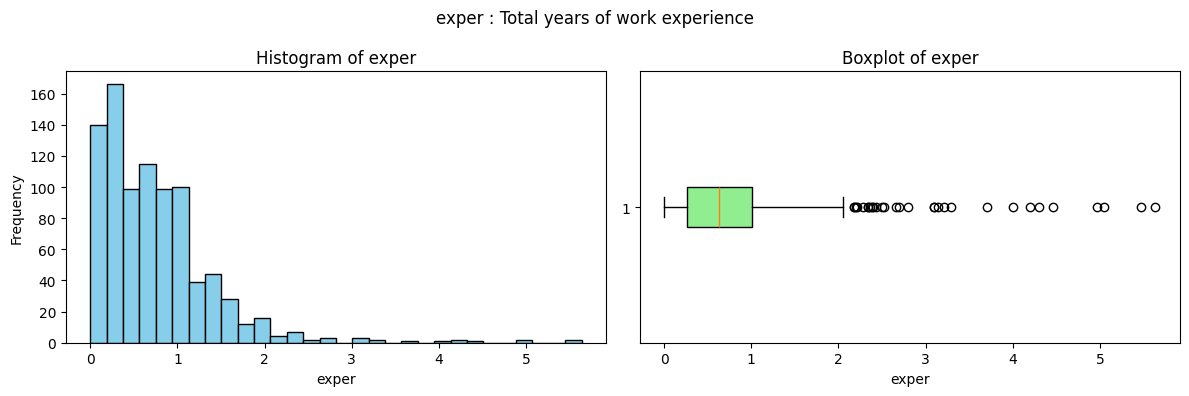

====== postexp : Years of post-school work experience ======
Count     : 888
Mean      : 0.1677
Median    : 0.0000
Variance  : 0.3007
Std Dev   : 0.5484
Mode      : 0.0000
IQR       : 0.0000
Range     : 5.6370
Min       : 0.0000
Max       : 5.6370




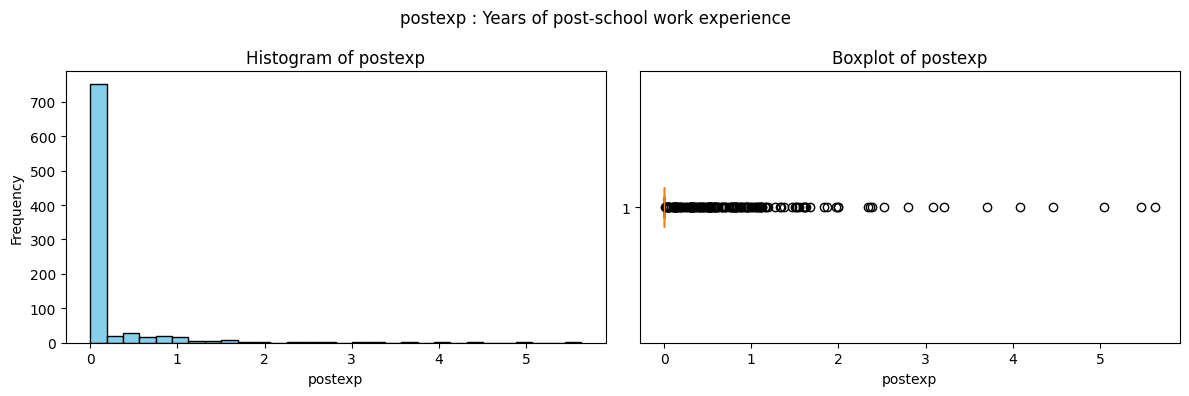

====== hgc : Highest grade completed (years of schooling) ======
Count     : 888
Mean      : 8.9167
Median    : 9.0000
Variance  : 1.8735
Std Dev   : 1.3688
Mode      : 8.0000
IQR       : 2.0000
Range     : 6.0000
Min       : 6.0000
Max       : 12.0000




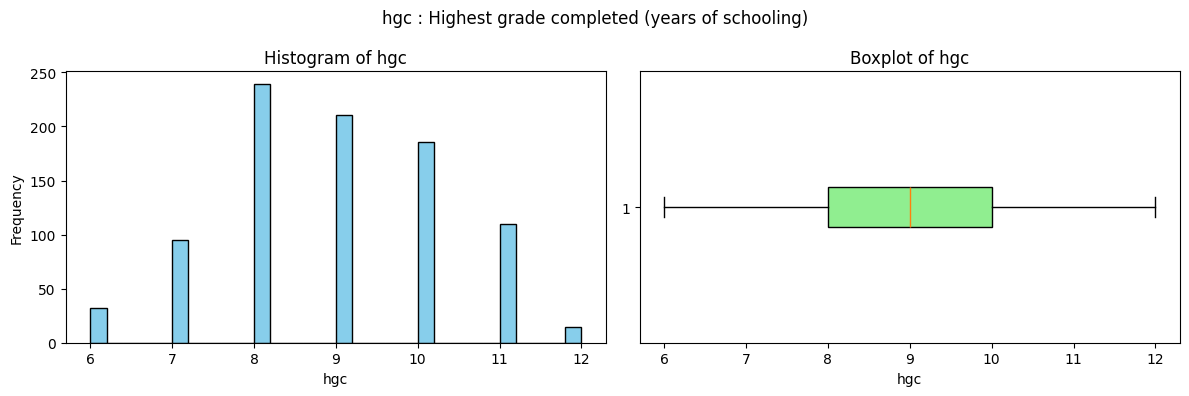

====== uerate : Unemployment rate at observation time ======
Count     : 888
Mean      : 8.7638
Median    : 8.3000
Variance  : 11.6418
Std Dev   : 3.4120
Mode      : 9.6000
IQR       : 3.9050
Range     : 20.8100
Min       : 2.8900
Max       : 23.7000




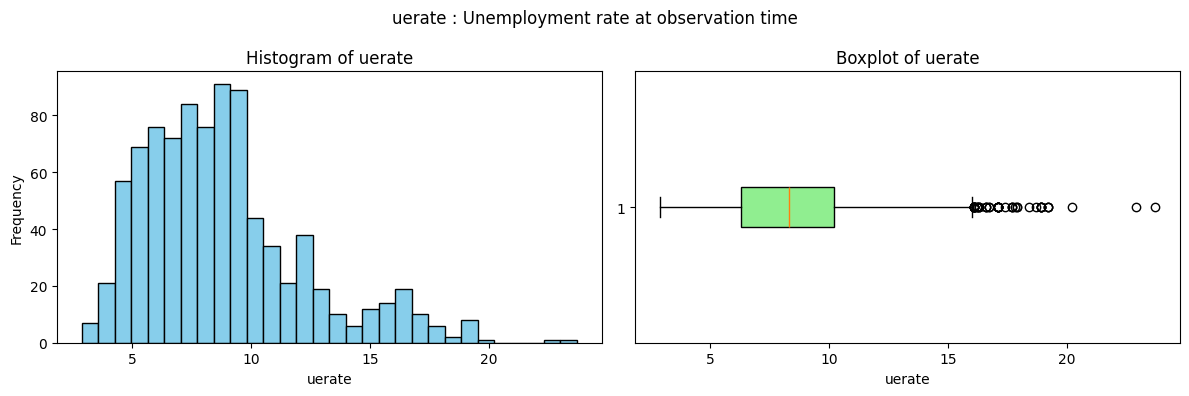

====== ue.7 : Unemployment rate at age 17 (or 7 years before entry) ======
Count     : 888
Mean      : 1.6916
Median    : 1.1000
Variance  : 10.8942
Std Dev   : 3.3006
Mode      : 0.7297
IQR       : 3.6050
Range     : 20.8100
Min       : -4.1050
Max       : 16.7050




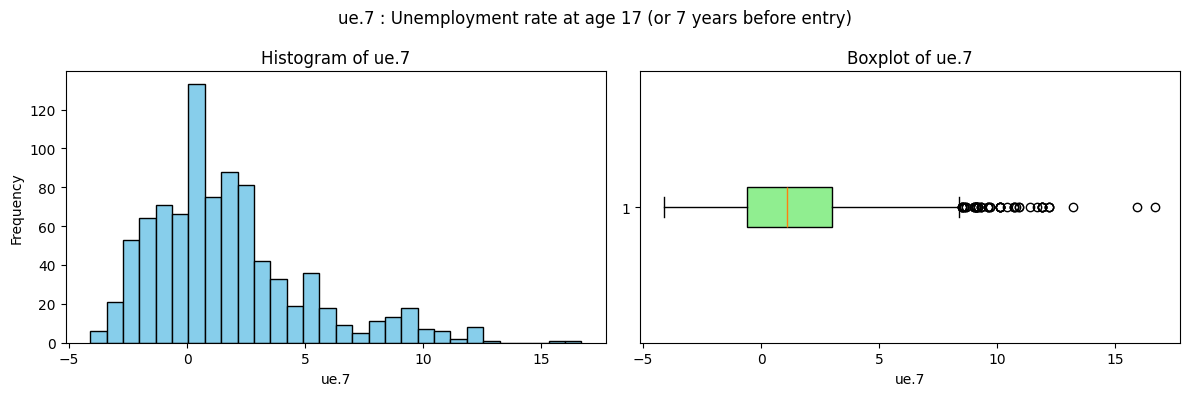

====== ue.centert1 : Centered unemployment rate (deviation from mean) ======
Count     : 888
Mean      : -0.0265
Median    : 0.0000
Variance  : 0.0125
Std Dev   : 0.1120
Mode      : 0.0000
IQR       : 0.0000
Range     : 0.5000
Min       : -0.5000
Max       : 0.0000




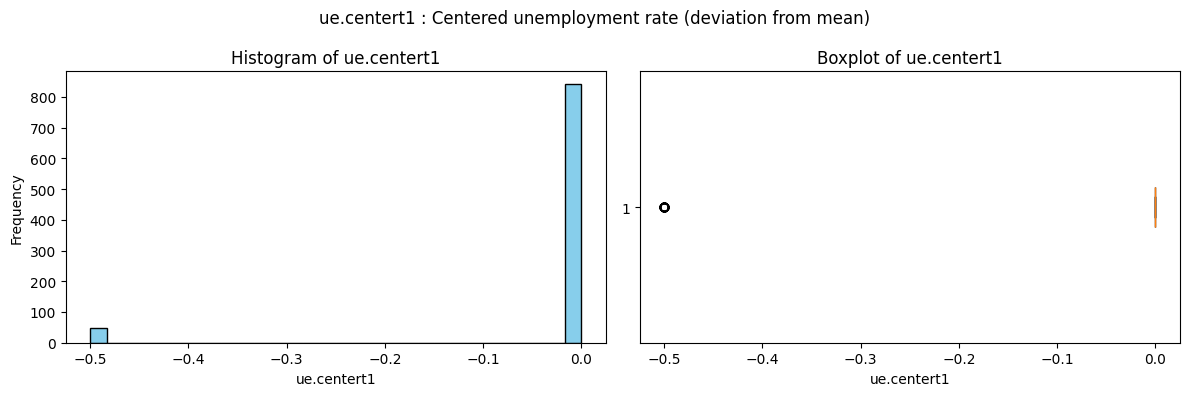

====== ue.mean : Average unemployment rate during early working years ======
Count     : 888
Mean      : 7.7163
Median    : 7.1700
Variance  : 6.0015
Std Dev   : 2.4498
Mode      : 6.4000
IQR       : 2.7350
Range     : 14.2400
Min       : 2.8900
Max       : 17.1300




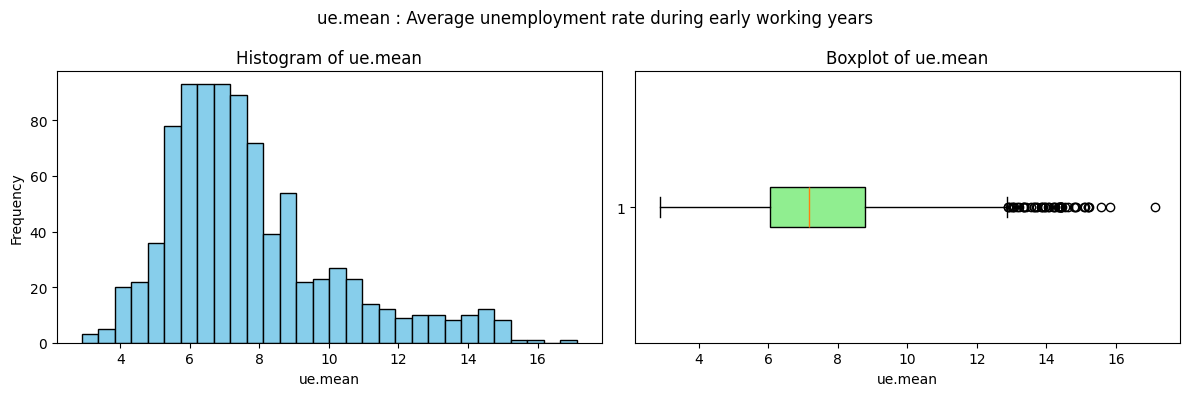

====== ue.person.cen : Person-level centered unemployment rate ======
Count     : 888
Mean      : 1.0482
Median    : 0.7995
Variance  : 5.7815
Std Dev   : 2.4045
Mode      : 0.0000
IQR       : 2.6132
Range     : 19.3360
Min       : -7.3850
Max       : 11.9510




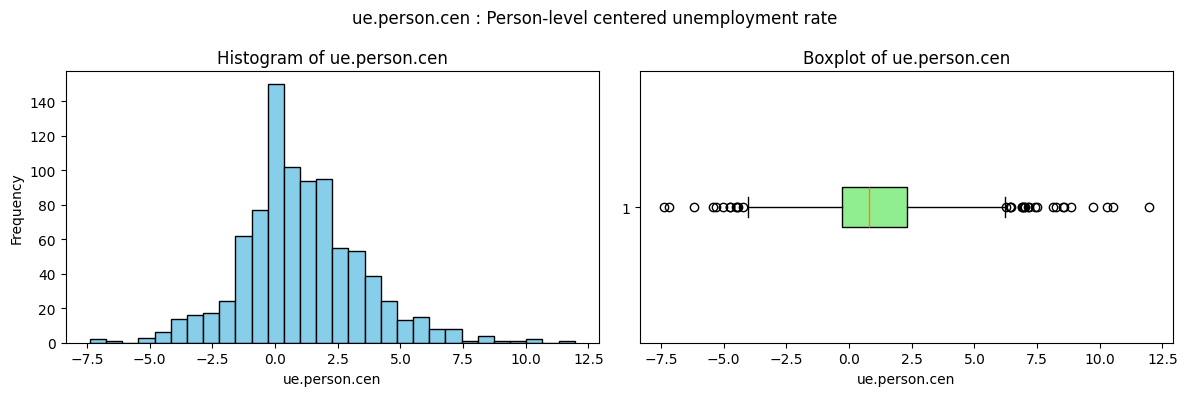

====== ue1 : Unemployment rate at labor market entry ======
Count     : 888
Mean      : 8.7638
Median    : 8.3000
Variance  : 11.6418
Std Dev   : 3.4120
Mode      : 9.6000
IQR       : 3.9050
Range     : 20.8100
Min       : 2.8900
Max       : 23.7000




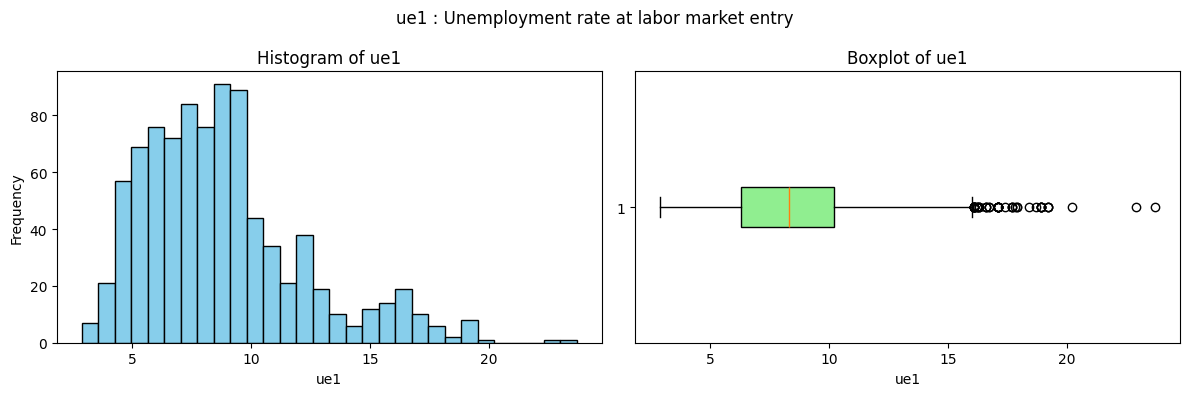

In [55]:
var_desc = {
    "lnw": "Natural logarithm of wages",
    "exper": "Total years of work experience",
    "postexp": "Years of post-school work experience",
    "hgc": "Highest grade completed (years of schooling)",
    "uerate": "Unemployment rate at observation time",
    "ue.7": "Unemployment rate at age 17 (or 7 years before entry)",
    "ue.centert1": "Centered unemployment rate (deviation from mean)",
    "ue.mean": "Average unemployment rate during early working years",
    "ue.person.cen": "Person-level centered unemployment rate",
    "ue1": "Unemployment rate at labor market entry"
}

num_vars = list(var_desc.keys())

for col in num_vars:
    series = data[col].dropna()

    # descriptive statistics
    mean_val = series.mean()
    median_val = series.median()
    var_val = series.var()
    mode_val = series.mode()[0] if not series.mode().empty else np.nan
    iqr_val = series.quantile(0.75) - series.quantile(0.25)
    range_val = series.max() - series.min()
    std_val = series.std()

    print(f"====== {col} : {var_desc[col]} ======")
    print(f"Count     : {series.count()}")
    print(f"Mean      : {mean_val:.4f}")
    print(f"Median    : {median_val:.4f}")
    print(f"Variance  : {var_val:.4f}")
    print(f"Std Dev   : {std_val:.4f}")
    print(f"Mode      : {mode_val:.4f}")
    print(f"IQR       : {iqr_val:.4f}")
    print(f"Range     : {range_val:.4f}")
    print(f"Min       : {series.min():.4f}")
    print(f"Max       : {series.max():.4f}")
    print("\n")

    fig, axes = plt.subplots(1, 2, figsize=(12,4))


    axes[0].hist(series, bins=30, edgecolor='k', color="skyblue")
    axes[0].set_title(f"Histogram of {col}")
    axes[0].set_xlabel(col)
    axes[0].set_ylabel("Frequency")

    # boxplot
    axes[1].boxplot(series, vert=False, patch_artist=True,
                    boxprops=dict(facecolor="lightgreen"))
    axes[1].set_title(f"Boxplot of {col}")
    axes[1].set_xlabel(col)

    plt.suptitle(f"{col} : {var_desc[col]}", fontsize=12)
    plt.tight_layout()
    plt.show()


# **Bivariate Analysis**

# Correlation Matrix

In [62]:
num_vars = ["lnw", "exper", "postexp", "hgc", "uerate", "ue.7",
            "ue.centert1", "ue.mean", "ue.person.cen", "ue1"]
corr_matrix = data[num_vars].corr()

print("===== Correlation Between Numerical Variables =====")
print(corr_matrix.round(3))


===== Correlation Between Numerical Variables =====
                 lnw  exper  postexp    hgc  uerate   ue.7  ue.centert1  \
lnw            1.000  0.117    0.137  0.161  -0.128 -0.126        0.035   
exper          0.117  1.000    0.574  0.131  -0.046 -0.049        0.012   
postexp        0.137  0.574    1.000  0.055  -0.085 -0.074        0.031   
hgc            0.161  0.131    0.055  1.000   0.008 -0.003       -0.003   
uerate        -0.128 -0.046   -0.085  0.008   1.000  0.961        0.051   
ue.7          -0.126 -0.049   -0.074 -0.003   0.961  1.000        0.047   
ue.centert1    0.035  0.012    0.031 -0.003   0.051  0.047        1.000   
ue.mean       -0.057 -0.053   -0.078  0.025   0.710  0.681        0.039   
ue.person.cen -0.124 -0.011   -0.042 -0.014   0.696  0.670        0.032   
ue1           -0.128 -0.046   -0.085  0.008   1.000  0.961        0.051   

               ue.mean  ue.person.cen    ue1  
lnw             -0.057         -0.124 -0.128  
exper           -0.053      

# Scatter Plot

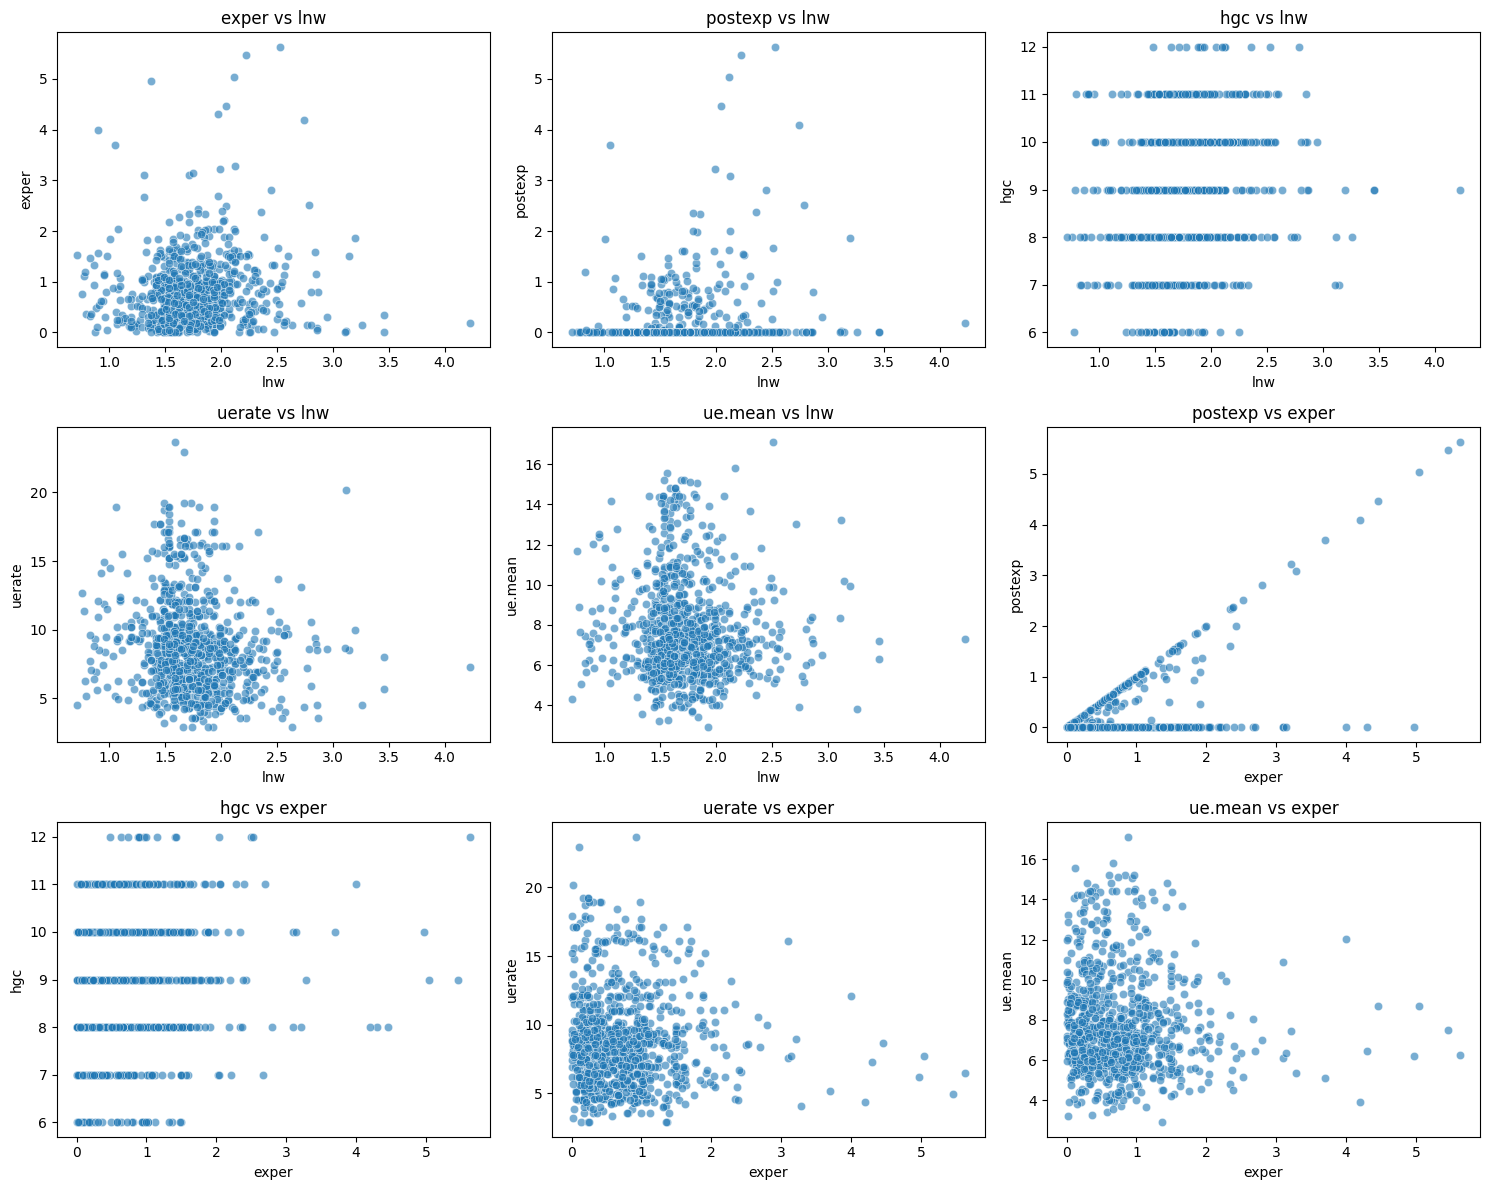

In [58]:
selected_vars = ["lnw", "exper", "postexp", "hgc", "uerate", "ue.mean"]

pairs = list(itertools.combinations(selected_vars, 2))

fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.flatten()

for i, (x, y) in enumerate(pairs[:9]):
    sns.scatterplot(x=x, y=y, data=data, alpha=0.6, ax=axes[i])
    axes[i].set_title(f"{y} vs {x}")

for j in range(len(pairs[:9]), 9):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


# **Multivariate Analysis**

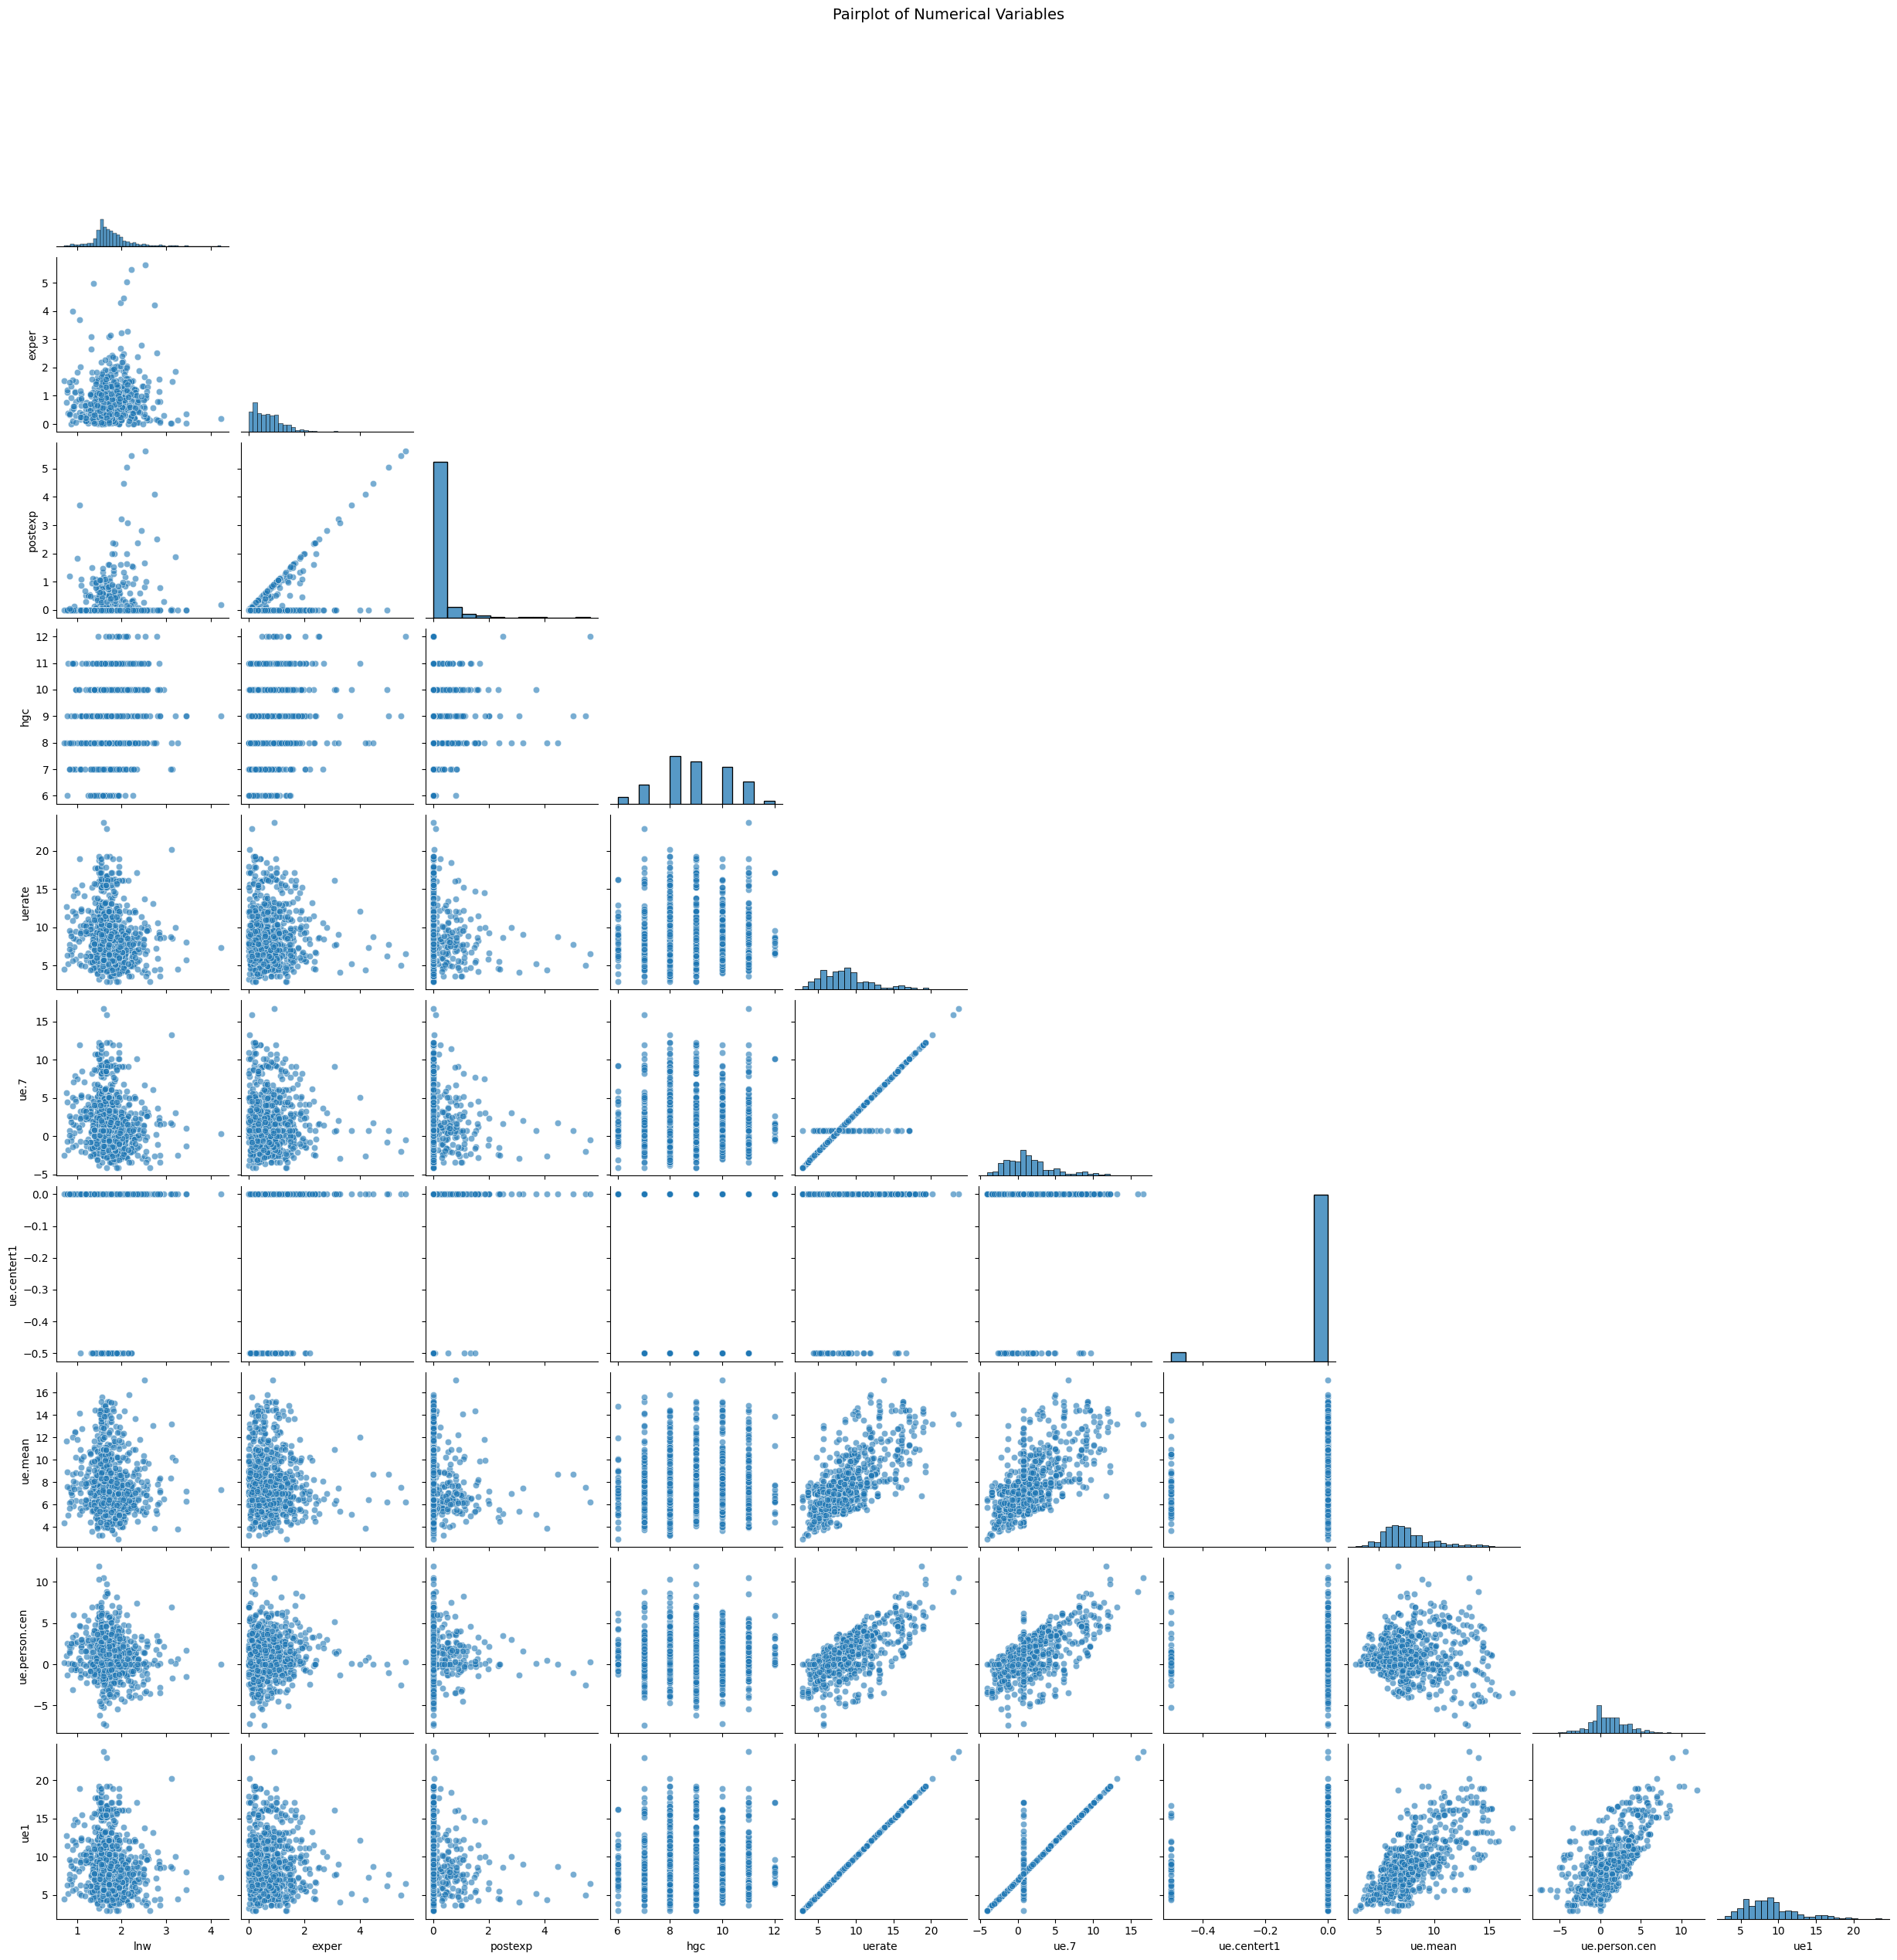

In [61]:
sns.pairplot(data[num_vars], diag_kind="hist", corner=True, plot_kws={'alpha':0.6})
plt.suptitle("Pairplot of Variables", y=1.02, fontsize=14)
plt.show()

# HeatMap

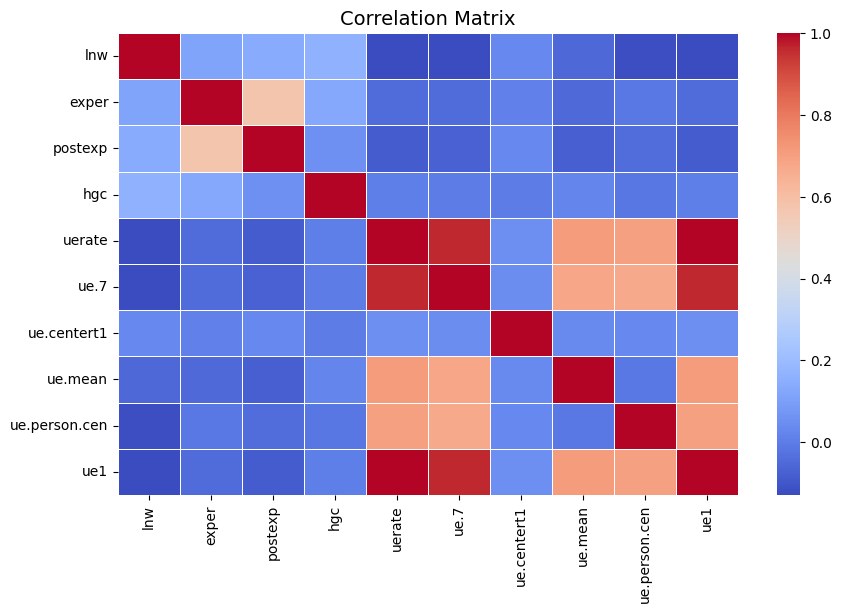

In [63]:
corr = data[num_vars].corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix", fontsize=14)
plt.show()